# Temporal Exploratory Analysis

In [ ]:
import matplotlib.font_manager as font_manager
import matplotlib.dates as matdates
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from os.path import expanduser
import matplotlib as mpl
import seaborn as sns

sns.set_style("ticks")
fontpath = expanduser('~/.local/share/fonts/LinLibertine_DRah.ttf')
prop = font_manager.FontProperties(fname=fontpath)

params = {
    'axes.labelsize': 9,
    'font.size': 9,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': prop.get_name(),
    'text.usetex': True
}
mpl.rcParams.update(params)


In [2]:
from helpers import jaccard, populate_bin_with_channel, add_user_to_bin, bins_y_o, bins_t_o, bin_to_df
from helpers import triple_bin_to_df, intersec_3, colors, _jaccard, bins_y_s, bins_t_s
from matplotlib.patches import Polygon
from sqlitedict import SqliteDict
import numpy as np
import pandas as pd

## Common Comenting Users Along the Years

In [3]:
# Calculates values to plot in the logarithmic scale maintaining meaninful proportion (for years).
def log_scale(df, shenanigans=True):
    df["idx_str"] = bins_t_o
    df_years = df.tail(12)
    if shenanigans:
        df_years["x+y"] = df_years["x"] + df_years["y"] - df_years["intersection"] 
        df_years["lg x+y"] = df_years["x+y"].apply(lambda x: np.log10(x))
        df_years["x-y'"] = df_years["x-y"] / df_years["x+y"] * df_years["lg x+y"] 
        df_years["y-x'"] = df_years["y-x"] / df_years["x+y"] * df_years["lg x+y"] 
        df_years["intersection'"] = df_years["intersection"] / df_years["x+y"] * df_years["lg x+y"]
    return df_years

In [4]:
# Read channels
df_sources = pd.read_csv("../data/sources_final.csv")
channel_dict = SqliteDict("../data/channel_dict.sqlite", tablename="channels")

In [5]:
# Create bins and populate them with channels
bins_ar, bins_al, bins_idw = {b:set() for b in bins_y_o}, {b:set() for b in bins_y_o}, {b:set() for b in bins_y_o}
for bin_dict, cat in zip([bins_ar, bins_al, bins_idw], ["Alt-right", "Alt-lite", "Intellectual Dark Web"]):
    for channel in df_sources.loc[df_sources["Category"] == cat, "Id"]:
        populate_bin_with_channel(channel, channel_dict, bin_dict)

In [6]:
# Create bins intersection given the specified function, here, `jaccard`
df_ar_al = bin_to_df(bins_y_o, bins_ar, bins_al, jaccard)
df_ar_idw = bin_to_df(bins_y_o, bins_ar, bins_idw, jaccard)

In [7]:
# Create intersection between all groups 
df_ar_al_id = triple_bin_to_df(bins_y_o, bins_ar, bins_al, bins_idw, intersec_3)

In [8]:
# Calls auxiliary function to prepare data to be plotted
df_ar_al_years = log_scale(df_ar_al)
df_ar_idw_years = log_scale(df_ar_idw)
df_itc_years = log_scale(df_ar_al_id, shenanigans=False)

/home/manoelribeiro/anaconda3/envs/community_fingerprinting/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/manoelribeiro/anaconda3/envs/community_fingerprinting/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/manoelribeiro/anaconda3/envs/community_fingerprinting/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

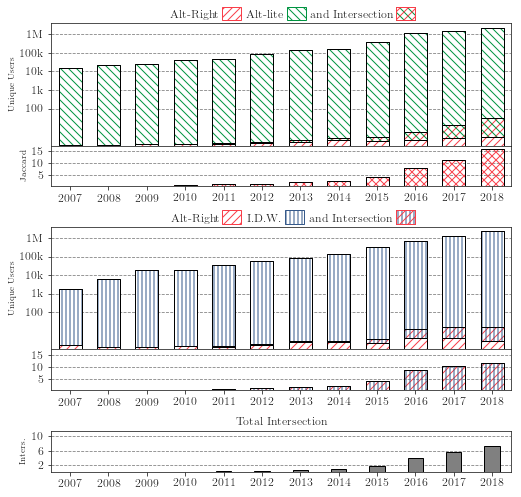

In [9]:
%matplotlib inline
fig = plt.figure(constrained_layout=False, figsize=(8.25,9.5))
gs = fig.add_gridspec(nrows=13, ncols=1, wspace=0.0, hspace=0, top=0.90)

ind = np.arange(12) 

# adds subplots
ax1 = fig.add_subplot(gs[1:4, 0])
ax3 = fig.add_subplot(gs[4,0])
ax2 = fig.add_subplot(gs[6:9,0])
ax4 = fig.add_subplot(gs[9,0])
ax5 = fig.add_subplot(gs[11:12,0])


# set ticks and grids
ax1.set_yticks([2, 3, 4, 5, 6, 7])
ax1.set_yticklabels(["100", "1k", "10k", "100k", "1M"])
ax2.set_yticks([2, 3, 4, 5, 6, 7])
ax2.set_yticklabels(["100", "1k", "10k", "100k", "1M"])
ax1.set_ylim([0,6.6])
ax2.set_ylim([0,6.6])
ax3.set_yticks([0.05, 0.10, 0.15])
ax3.set_yticklabels(["5%", "10%",  "15%"])
ax3.set_xticklabels(df_ar_al_years["idx_str"],  rotation=0)

ax3.set_xticks(ind)
ax4.set_yticks([0.05, 0.10, 0.15])
ax4.set_yticklabels(["5%", "10%",  "15%"])
ax4.set_xticklabels(df_ar_al_years["idx_str"],  rotation=0)
ax4.set_xticks(ind)
ax5.set_xticks(ind)
ax5.set_xticklabels(df_ar_al_years["idx_str"],  rotation=0)
ax5.set_yticks([0.02, 0.06, 0.10])
ax5.set_yticklabels(["2%", "6%",  "10%"])

# set titles
ax1.set_title("Alt-Right \ \ \ \ \ \ Alt-lite \ \ \ \ \ \ and Intersection")
ax1.set_ylabel("Unique Users")
ax2.set_ylabel("Unique Users")
ax2.set_title("Alt-Right \ \ \ \ \ \ I.D.W. \ \ \ \ \ \ and Intersection")
ax5.set_title("Total Intersection")
# set lims and axis
ax1.set_xlim([-0.5, 11.5])
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linestyle='dashed')
ax2.set_xlim([-0.5, 11.5])
ax2.set_axisbelow(True)
ax2.yaxis.grid(color='gray', linestyle='dashed')
ax3.set_ylim([0, 0.175])
ax3.set_xlim([-0.5, 11.5])
ax3.set_ylabel("  Jaccard")
ax5.set_ylabel("  Jaccard")
ax3.set_axisbelow(True)
ax3.yaxis.grid(color='gray', linestyle='dashed')
ax4.set_ylim([0, 0.175])
ax4.set_xlim([-0.5, 11.5])
ax4.set_axisbelow(True)
ax4.yaxis.grid(color='gray', linestyle='dashed')
ax5.yaxis.grid(color='gray', linestyle='dashed')
ax5.set_ylabel("Inters.")
ax5.set_xlim([-0.5, 11.5])
ax5.set_ylim([0, 0.115])

# -- yearly plot

# AR/AL
ax1.bar(ind, df_ar_al_years["x-y'"].values, 0.6, 
        hatch="///", edgecolor=colors["Alt-right"], color=(1, 1, 1))
ax1.bar(ind, df_ar_al_years["x-y'"].values, 0.6, 
        hatch="", edgecolor="black", color=(1, 1, 1), facecolor=(0,0,0,0))
ax1.bar(ind, df_ar_al_years["intersection'"].values, 0.6, 
        bottom=df_ar_al_years["x-y'"].values, 
        hatch="///", edgecolor=colors["Alt-right"], facecolor=(0,0,0,0))
ax1.bar(ind, df_ar_al_years["intersection'"].values, 0.6, 
        bottom=df_ar_al_years["x-y'"].values, 
        hatch="\\\\\\", edgecolor=colors["Alt-lite"], facecolor=(0,0,0,0))
ax1.bar(ind, df_ar_al_years["intersection'"].values, 0.6, 
        bottom=df_ar_al_years["x-y'"].values, 
        hatch="", edgecolor="black", facecolor=(0,0,0,0))
ax1.bar(ind, df_ar_al_years["y-x'"].values, 0.6, 
        bottom=df_ar_al_years["x-y'"].values + df_ar_al_years["intersection'"].values, 
        hatch="\\\\\\", edgecolor=colors["Alt-lite"], color=(1, 1, 1))
ax1.bar(ind, df_ar_al_years["y-x'"].values, 0.6, 
        bottom=df_ar_al_years["x-y'"].values + df_ar_al_years["intersection'"].values, 
        hatch="", edgecolor="black", facecolor=(0,0,0,0))

# AR/IDW
ax2.bar(ind, df_ar_idw_years["x-y'"].values, 0.6, 
        hatch="///", edgecolor=colors["Alt-right"], color=(1, 1, 1))
ax2.bar(ind, df_ar_idw_years["x-y'"].values, 0.6, 
        hatch="", edgecolor="black", color=(1, 1, 1), facecolor=(0,0,0,0))
ax2.bar(ind, df_ar_idw_years["intersection'"].values, 0.6, 
        bottom=df_ar_idw_years["x-y'"].values, 
        hatch="///", edgecolor=colors["Alt-right"], facecolor=(0,0,0,0))
ax2.bar(ind, df_ar_idw_years["intersection'"].values, 0.6, 
        bottom=df_ar_idw_years["x-y'"].values, 
        hatch="|||", edgecolor=colors["Intellectual Dark Web"], facecolor=(0,0,0,0))
ax2.bar(ind, df_ar_idw_years["intersection'"].values, 0.6, 
        bottom=df_ar_idw_years["x-y'"].values, 
        hatch="", edgecolor="black", facecolor=(0,0,0,0))
ax2.bar(ind, df_ar_idw_years["y-x'"].values, 0.6, 
        bottom=df_ar_idw_years["x-y'"].values + df_ar_idw_years["intersection'"].values, 
        hatch="|||", edgecolor=colors["Intellectual Dark Web"], color=(1, 1, 1))
ax2.bar(ind, df_ar_idw_years["y-x'"].values, 0.6, 
        bottom=df_ar_idw_years["x-y'"].values + df_ar_idw_years["intersection'"].values, 
        hatch="", edgecolor="black", facecolor=(0,0,0,0))

# --- jaccard

# AR/AL
ax3.bar(ind, df_ar_al_years["jaccard"], 0.6, 
        hatch="///", edgecolor=colors["Alt-right"], facecolor=(0,0,0,0))
ax3.bar(ind, df_ar_al_years["jaccard"], 0.6, 
        hatch="\\\\\\", edgecolor=colors["Alt-right"],  facecolor=(0,0,0,0))
ax3.bar(ind, df_ar_al_years["jaccard"], 0.6, 
        hatch="", edgecolor="black",  facecolor=(0,0,0,0))

# AR/IDW
ax4.bar(ind, df_ar_idw_years["jaccard"], 0.6, 
        hatch="///", edgecolor=colors["Alt-right"], facecolor=(0,0,0,0))
ax4.bar(ind, df_ar_idw_years["jaccard"], 0.6, 
        hatch="|||", edgecolor=colors["Intellectual Dark Web"], facecolor=(0,0,0,0))

ax4.bar(ind, df_ar_idw_years["jaccard"], 0.6, 
        hatch="", edgecolor="black",facecolor=(0,0,0,0))

# intersec
ax5.bar(ind, df_itc_years["xyz_p"], 0.4, 
        hatch="", edgecolor="black", color="grey")



# plots text on top
# ax1.text(0.7, 9.8, "Alt-right", horizontalalignment="left",  verticalalignment="top", fontsize=15)
ax1.add_patch(Polygon([[3.95, 6.75], [3.95, 7.5], [4.45, 7.5], [4.45, 6.75]], closed=True, fill=False, 
                      hatch='///', edgecolor=colors["Alt-right"], clip_on=False))
ax1.add_patch(Polygon([[5.65, 6.75], [5.65, 7.5], [6.15, 7.5], [6.15, 6.75]], closed=True, fill=False, 
                      hatch='\\\\\\', edgecolor=colors["Alt-lite"], clip_on=False))
ax1.add_patch(Polygon([[8.5, 6.75], [8.5, 7.5], [9, 7.5], [9, 6.75]], closed=True, fill=False, 
                      hatch='\\\\\\', edgecolor=colors["Alt-lite"], clip_on=False))
ax1.add_patch(Polygon([[8.5, 6.75], [8.5, 7.5], [9, 7.5], [9, 6.75]], closed=True, fill=False, 
                      hatch='///', edgecolor=colors["Alt-right"], clip_on=False))
ax2.add_patch(Polygon([[3.95, 6.75], [3.95, 7.5], [4.45, 7.5], [4.45, 6.75]], closed=True, fill=False, 
                      hatch='///', edgecolor=colors["Alt-right"], clip_on=False))
ax2.add_patch(Polygon([[5.6, 6.75], [5.6, 7.5], [6.1, 7.5], [6.1, 6.75]], closed=True, fill=False, 
                      hatch="|||", edgecolor=colors["Intellectual Dark Web"], clip_on=False))
ax2.add_patch(Polygon([[8.5, 6.75], [8.5, 7.5], [9, 7.5], [9, 6.75]], closed=True, fill=False, 
                      hatch="|||", edgecolor=colors["Intellectual Dark Web"], clip_on=False))
ax2.add_patch(Polygon([[8.5, 6.75], [8.5, 7.5], [9, 7.5], [9, 6.75]], closed=True, fill=False, 
                      hatch='///', edgecolor=colors["Alt-right"], clip_on=False))

fig.savefig("../imgs/unique_users.pdf", bbox_inches='tight')
fig.savefig("../imgs/unique_users.png", bbox_inches='tight')